In [2]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

from pathlib import Path
from tqdm import tqdm

import numpy as np
import os.path as op
import os

2.4.1


In [3]:
class_names = ['dog', 'rooster', 'pig', 'cow', 'frog',
          'cat', 'hen', 'insects', 'sheep', 'crow',
          'rain', 'sea_waves', 'crackling_fire', 'crickets', 'chirping_birds',
          'water_drops', 'wind', 'pouring_water', 'toilet_flush', 'thunderstorm',
          'crying_baby', 'sneezing', 'clapping', 'breathing', 'coughing',
          'footsteps', 'laughing', 'brushing_teeth', 'snoring', 'drinking_sipping',
          'door_wood_knock', 'mouse_click', 'keyboard_typing', 'door_wood_creaks', 'can_opening',
          'washing_machine', 'vacuum_cleaner', 'clock_alarm', 'clock_tick', 'glass_breaking',
          'helicopter', 'chainsaw', 'siren', 'car_horn', 'engine',
          'train', 'church_bells', 'airplane', 'fireworks', 'hand_saw']

In [3]:
### Audio preprocess
spec_pth = '/work/r08922a13/Waveform-auto-encoder/datasets/ESC-50-master/spectrogram_15seg'
validation_split = 0.1

train_name = []
train_specs = []
train_labels = []

test_name = []
test_specs = []
test_labels = []

n_data = len(os.listdir(spec_pth)) - 1
print(f'There are {n_data} files.')

for i, filename in tqdm(enumerate(Path(spec_pth).glob('*.npy'))):
    #print(filename)
    data_name = str(filename)
    data = np.load(filename)
    #print(data.shape)
    w, h, _ = data.shape
    data = data.reshape(w, h)
    #print(data.shape)
    #print(data, data.max(), data.min())
    
    class_name = int(op.basename(filename).split('-')[-1].split('_')[0])
    #print(data_name, class_name)
    
    if i < n_data * validation_split:
        test_name.append(data_name)
        test_specs.append(data)
        test_labels.append(class_name)
    else:
        train_name.append(data_name)
        train_specs.append(data)
        train_labels.append(class_name)
train_specs = np.array(train_specs)
test_specs = np.array(test_specs)

5it [00:00, 39.74it/s]

There are 6000 files.


6000it [02:02, 48.87it/s]


In [6]:
# save as txt file
training_file = './data/train_list.txt'
testing_file = './data/test_list.txt'

'''
length = len(train_name)
with open(training_file, 'w') as f:
    for i in range(length):
        f.write(str(train_name[i]) + ' ' + str(train_labels[i]) +'\n')
        
length = len(test_name)
with open(testing_file, 'w') as f:
    for i in range(length):
        f.write(str(test_name[i]) + ' ' + str(test_labels[i]) +'\n')
'''

"\nlength = len(train_name)\nwith open(training_file, 'w') as f:\n    for i in range(length):\n        f.write(str(train_name[i]) + ' ' + str(train_labels[i]) +'\n')\n        \nlength = len(test_name)\nwith open(testing_file, 'w') as f:\n    for i in range(length):\n        f.write(str(test_name[i]) + ' ' + str(test_labels[i]) +'\n')\n"

In [8]:
def load_data_filename(filename, batch=False):
    datas = []
    labels = []
    with open(filename, 'r') as f:
        data_list = f.read().splitlines()
        for line in data_list:
            #datas.append(line.split(' ')[0])
            data_name = line.split(' ')[0]
            data = np.load(data_name)
            if batch is False:
                w, h, _ = data.shape
                data = data.reshape(w, h)
            datas.append(data)

            labels.append(int(line.split(' ')[1]))
    return np.array(datas), np.array(labels)

In [9]:
train_specs, train_labels = load_data_filename(training_file)

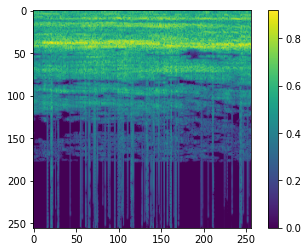

In [10]:
plt.figure()
plt.imshow(train_specs[0])
plt.colorbar()
plt.grid(False)
plt.show()

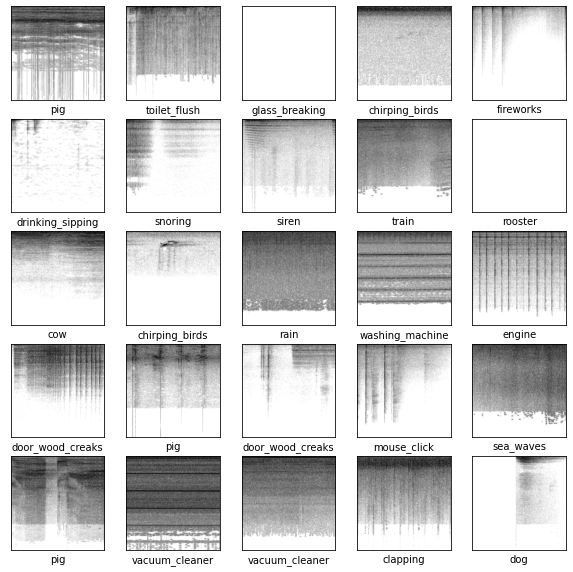

In [11]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_specs[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [14]:
audio_pth = '/work/r08922a13/Waveform-auto-encoder/datasets/ESC-50-master/audio_15seg'

n_data = len(os.listdir(audio_pth))
print(f'There are {n_data} files.')

for i, filename in tqdm(enumerate(Path(audio_pth).glob('*'))):
    print(filename)
    
    break

1978it [00:00, 19531.68it/s]

There are 6000 files.
/work/r08922a13/Waveform-auto-encoder/datasets/ESC-50-master/audio_15seg/3-170383-A-38_1.wav
/work/r08922a13/Waveform-auto-encoder/datasets/ESC-50-master/audio_15seg/3-70962-C-4_3.wav
/work/r08922a13/Waveform-auto-encoder/datasets/ESC-50-master/audio_15seg/5-232802-A-31_2.wav
/work/r08922a13/Waveform-auto-encoder/datasets/ESC-50-master/audio_15seg/4-182395-A-0_2.wav
/work/r08922a13/Waveform-auto-encoder/datasets/ESC-50-master/audio_15seg/5-243449-A-14_3.wav
/work/r08922a13/Waveform-auto-encoder/datasets/ESC-50-master/audio_15seg/4-198962-A-25_3.wav
/work/r08922a13/Waveform-auto-encoder/datasets/ESC-50-master/audio_15seg/5-197121-B-45_1.wav
/work/r08922a13/Waveform-auto-encoder/datasets/ESC-50-master/audio_15seg/5-198411-G-20_2.wav
/work/r08922a13/Waveform-auto-encoder/datasets/ESC-50-master/audio_15seg/1-58923-A-27_3.wav
/work/r08922a13/Waveform-auto-encoder/datasets/ESC-50-master/audio_15seg/4-196671-B-8_3.wav
/work/r08922a13/Waveform-auto-encoder/datasets/ESC-50

6000it [00:00, 17478.74it/s]

/work/r08922a13/Waveform-auto-encoder/datasets/ESC-50-master/audio_15seg/1-46353-A-49_2.wav
/work/r08922a13/Waveform-auto-encoder/datasets/ESC-50-master/audio_15seg/3-203373-A-39_1.wav
/work/r08922a13/Waveform-auto-encoder/datasets/ESC-50-master/audio_15seg/3-216281-A-39_3.wav
/work/r08922a13/Waveform-auto-encoder/datasets/ESC-50-master/audio_15seg/2-188822-C-40_2.wav
/work/r08922a13/Waveform-auto-encoder/datasets/ESC-50-master/audio_15seg/4-213915-C-3_3.wav
/work/r08922a13/Waveform-auto-encoder/datasets/ESC-50-master/audio_15seg/1-19118-A-24_1.wav
/work/r08922a13/Waveform-auto-encoder/datasets/ESC-50-master/audio_15seg/3-132747-A-26_3.wav
/work/r08922a13/Waveform-auto-encoder/datasets/ESC-50-master/audio_15seg/4-234879-A-6_3.wav
/work/r08922a13/Waveform-auto-encoder/datasets/ESC-50-master/audio_15seg/2-103424-A-3_1.wav
/work/r08922a13/Waveform-auto-encoder/datasets/ESC-50-master/audio_15seg/1-36397-A-23_1.wav
/work/r08922a13/Waveform-auto-encoder/datasets/ESC-50-master/audio_15seg/4-1